# Imports

In [ ]:
import pandas as pd
import numpy as np

# Load the data 

In [2]:
df_load = pd.read_csv('/Users/admin/Downloads/Pandas/Данные_по_транзакционной_активности_клиентов.csv')
df_load.head()

,client_id,gender,birth_date,create_date,nonresident_flag,businessman_flag,city,term,contract_sum,product_category_name,...,card_type_name,start_date,fact_close_date,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum,card_type
0,fe60b594364f9f636266ed1ef4f89c32,Ж,1985,2020-01-29,R,0,Гусь-Хрустальный,NaN,0.0,Договор на текущий счет для дебетовой карты,...,Visa Platinum Rewards,2019.0,2021.0,16600.0,71,39700.0,25700.0,220600.0,201000.0,dc
1,3012cabca5885ed53d348d6e57dab5de,М,1951,2009-09-24,R,0,Ишимбай,NaN,0.0,Договор на текущий счет для дебетовой карты,...,VISA Classic,2019.0,NaN,0.0,0,1900.0,1000.0,6200.0,3000.0,dc
2,d871ef96820b6c7a1ada8e01a772724e,Ж,1982,2006-12-25,R,0,Юрга,NaN,0.0,Договор на текущий счет для дебетовой карты,...,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,dc
3,0bacbc2abd314f9fac031d249e485a7b,М,1955,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,Visa Rewards,2021.0,NaN,24300.0,118,0.0,0.0,35400.0,35400.0,cc
4,0bacbc2abd314f9fac031d249e485a7b,М,1955,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,Eurocard/MasterCard World,2018.0,2022.0,24300.0,118,0.0,0.0,35400.0,35400.0,cc


# Load parsing data

In [63]:
tg_adult_df = pd.read_csv('/Users/admin/Downloads/tg_adult.csv',sep=';')
tg_buisness_df = pd.read_csv('/Users/admin/Downloads/tg_buisness.csv',sep=';')
tg_kids_df = pd.read_csv('/Users/admin/Downloads/tg_kids.csv',sep=';')
tg_men_df = pd.read_csv('/Users/admin/Downloads/tg_men.csv',sep=';')
tg_youth_df = pd.read_csv('/Users/admin/Downloads/tg_youth.csv',sep=';')
tg_women_df = pd.read_csv('/Users/admin/Downloads/tg_women.csv',sep=';')

### Chech the data 

In [64]:
print(tg_adult_df.shape) # (30, 5)
print(tg_buisness_df.shape) # (30, 5)
print(tg_kids_df.shape) # (30, 5)
print(tg_men_df.shape) # (30, 5)
print(tg_youth_df.shape) # (30, 5)
print(tg_women_df.shape) # (30, 5)

(30, 5)
(30, 5)
(30, 5)
(30, 5)
(30, 5)
(30, 5)


In [68]:
display(tg_adult_df.sample(3))

,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
3,Котя,247'971,+92'549,Не указано,https://tmtr.me/kotya
19,Моя дача,391'228,+83'580,Не указано,https://tmtr.me/mydaca
18,Okinohit.top,93'013,+91'700,Не указано,https://tmtr.me/okinohit


In [69]:
display(tg_adult_df.sample(3)) 
display(tg_buisness_df.sample(3)) 
display(tg_kids_df.sample(3))
display(tg_men_df.sample(3)) 
display(tg_youth_df.sample(3)) 
display(tg_women_df.sample(3)) 

,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
20,Мир Сериалов | Игра в кальмара 2 | Мы все мертвы,357'539,+75'411,Не указано,https://tmtr.me/serialoffmir
12,Мудрый Строитель,218'244,+36'730,Не указано,https://tmtr.me/joinchat/JKXt99Gz3W03ODky
19,Моя дача,391'228,+83'580,Не указано,https://tmtr.me/mydaca


,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
17,Инвестиции Ладесова,343'707,+32'378,Не указано,https://tmtr.me/invest_ladesov
20,Банкофф,68'009,+22'048,Не указано,https://tmtr.me/joinchat/B_ySnB8TDpw3NDU6
22,Pro Бизнес,124'451,+18'834,Не указано,https://tmtr.me/business_ru24


,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
2,GamezTop 🎮,86'385,+72'521,Не указано,https://tmtr.me/gameztop7
10,РАЙЗ ЛАВ Ю,179'735,+16'519,Не указано,https://tmtr.me/csgomajor
17,FlowApk,378'885,+58'929,Не указано,https://tmtr.me/flowapk


,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
25,Фучур,75'315,+44'682,Не указано,https://tmtr.me/future5000
23,Золотые руки,229'854,+52'935,Не указано,https://tmtr.me/joinchat/i8fu7rBYDQ8zNDky
20,Vоенкор Котенок Z,308'836,+66'258,Не указано,https://tmtr.me/voenkorkotenok


,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
7,ТОПЛЕС,537'038,+52'172,Не указано,https://tmtr.me/toplesofficial
0,Собакен,335'293,+103'344,Не указано,https://tmtr.me/sobake_n
4,Киноманы,437'676,+85'335,Не указано,https://tmtr.me/kinomanies


,Название канала,Число подписчиков,Прирост подписчиков за месяц,Стоимость одного поста,Ссылка на канал
25,Шедевры кулинарии,158'911,+19'433,Не указано,https://tmtr.me/shecook
10,Мясная кухня,341'019,+20'377,Не указано,https://tmtr.me/meat_cookroom
23,Ideas for photos 🤍,133'781,+20'646,Не указано,https://tmtr.me/photooideaas


In [5]:
df_load.columns

Index(['client_id', 'gender', 'birth_date', 'create_date', 'nonresident_flag',
       'businessman_flag', 'city', 'term', 'contract_sum',
       'product_category_name', 'card_id', 'card_type_name', 'start_date',
       'fact_close_date', 'purchase_sum', 'purchase_count',
       'current_balance_avg_sum', 'current_balance_sum',
       'current_debit_turn_sum', 'current_credit_turn_sum', 'card_type'],
      dtype='object')

In [6]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371583 entries, 0 to 371582
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                371583 non-null  object 
 1   gender                   371583 non-null  object 
 2   birth_date               371583 non-null  int64  
 3   create_date              371583 non-null  object 
 4   nonresident_flag         371583 non-null  object 
 5   businessman_flag         371583 non-null  int64  
 6   city                     370415 non-null  object 
 7   term                     0 non-null       float64
 8   contract_sum             371583 non-null  float64
 9   product_category_name    371583 non-null  object 
 10  card_id                  371583 non-null  object 
 11  card_type_name           318638 non-null  object 
 12  start_date               318638 non-null  float64
 13  fact_close_date          132176 non-null  float64
 14  purc

In [7]:
np.unique(df_load['product_category_name'])

array(['Договор на текущий счет для дебетовой карты', 'Кредитная карта'],
      dtype=object)

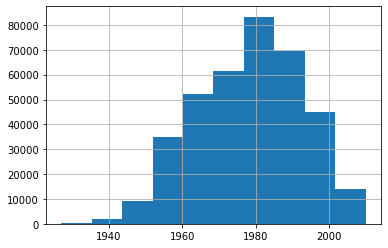

In [8]:
df_load['birth_date'].hist()

In [9]:
df_load.describe()

,birth_date,businessman_flag,term,contract_sum,start_date,fact_close_date,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum
count,371583.000000,371583.0,0.0,3.715830e+05,318638.000000,132176.000000,3.715830e+05,371583.000000,3.715830e+05,3.715830e+05,3.715830e+05,3.715830e+05
mean,1978.405368,0.0,NaN,1.257979e+04,2019.414935,2020.601864,6.449207e+03,8.309522,2.965146e+04,2.949709e+04,2.997173e+04,2.973149e+04
std,14.195167,0.0,NaN,1.317040e+05,1.566411,1.217111,2.638060e+04,18.315616,2.194973e+05,2.219825e+05,2.331851e+05,2.384009e+05
min,1927.000000,0.0,NaN,0.000000e+00,2013.000000,2015.000000,-7.000000e+02,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1968.000000,0.0,NaN,0.000000e+00,2018.000000,2020.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1980.000000,0.0,NaN,0.000000e+00,2020.000000,2021.000000,0.000000e+00,0.000000,3.000000e+02,0.000000e+00,1.600000e+03,1.700000e+03
75%,1989.000000,0.0,NaN,0.000000e+00,2021.000000,2021.000000,3.700000e+03,7.000000,5.700000e+03,4.100000e+03,2.150000e+04,2.110000e+04
max,2010.000000,0.0,NaN,1.061710e+07,2022.000000,2022.000000,3.257200e+06,297.000000,1.920220e+07,1.928620e+07,5.855680e+07,5.997400e+07


# Preprocessing the data

In [399]:
df = df_load.copy()
print(df.shape) # (371583, 21)

(371583, 21)


In [400]:
df['age'] = df['birth_date'] 
df['birth_date'] = 2022 - df['birth_date'] 
df['target'] = df['current_debit_turn_sum'] * 0.01 + df['current_credit_turn_sum'] * 0.1
df.head()

In [403]:
df.dtypes

client_id                   object
gender                      object
birth_date                   int64
create_date                 object
nonresident_flag            object
businessman_flag             int64
city                        object
term                       float64
contract_sum               float64
product_category_name       object
card_id                     object
card_type_name              object
start_date                 float64
fact_close_date            float64
purchase_sum               float64
purchase_count               int64
current_balance_avg_sum    float64
current_balance_sum        float64
current_debit_turn_sum     float64
current_credit_turn_sum    float64
card_type                   object
age                          int64
target                     float64
dtype: object

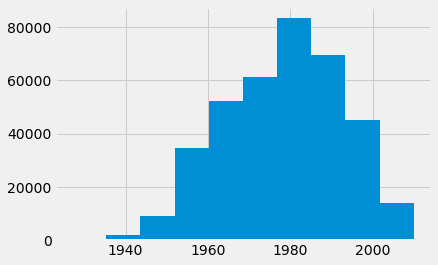

In [405]:
df['age'].hist()

In [406]:
df['group'] = np.nan
df.head()

,client_id,gender,birth_date,create_date,nonresident_flag,businessman_flag,city,term,contract_sum,product_category_name,...,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum,card_type,age,target,group
0,fe60b594364f9f636266ed1ef4f89c32,Ж,37,2020-01-29,R,0,Гусь-Хрустальный,NaN,0.0,Договор на текущий счет для дебетовой карты,...,16600.0,71,39700.0,25700.0,220600.0,201000.0,dc,1985,22306.0,NaN
1,3012cabca5885ed53d348d6e57dab5de,М,71,2009-09-24,R,0,Ишимбай,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0.0,0,1900.0,1000.0,6200.0,3000.0,dc,1951,362.0,NaN
2,d871ef96820b6c7a1ada8e01a772724e,Ж,40,2006-12-25,R,0,Юрга,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0.0,0,0.0,0.0,0.0,0.0,dc,1982,0.0,NaN
3,0bacbc2abd314f9fac031d249e485a7b,М,67,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,24300.0,118,0.0,0.0,35400.0,35400.0,cc,1955,3894.0,NaN
4,0bacbc2abd314f9fac031d249e485a7b,М,67,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,24300.0,118,0.0,0.0,35400.0,35400.0,cc,1955,3894.0,NaN


In [407]:
df.groupby(['gender']).agg({'client_id':'count','current_balance_sum':'mean'})


,client_id,current_balance_sum
gender,,
Ж,199668,25511.989402
М,171915,34125.512608


In [408]:
df['group'][df['birth_date'] < 18] = 'Children'
df['group'][(df['birth_date'] >= 18) & (df['birth_date'] <35)] = 'Young'
df['group'][(df['birth_date'] >= 35) & (df['birth_date'] <54)] = 'Adult'
df['group'][df['birth_date'] > 55] = 'Retired'
df.head()


<ipython-input-408-759d3bc8dcca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][df['birth_date'] < 18] = 'Children'
<ipython-input-408-759d3bc8dcca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][(df['birth_date'] >= 18) & (df['birth_date'] <35)] = 'Young'
<ipython-input-408-759d3bc8dcca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][(df['birth_date'] >= 35) & (df['birth_date'] <54)] = 'Adult'

,client_id,gender,birth_date,create_date,nonresident_flag,businessman_flag,city,term,contract_sum,product_category_name,...,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum,card_type,age,target,group
0,fe60b594364f9f636266ed1ef4f89c32,Ж,37,2020-01-29,R,0,Гусь-Хрустальный,NaN,0.0,Договор на текущий счет для дебетовой карты,...,16600.0,71,39700.0,25700.0,220600.0,201000.0,dc,1985,22306.0,Adult
1,3012cabca5885ed53d348d6e57dab5de,М,71,2009-09-24,R,0,Ишимбай,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0.0,0,1900.0,1000.0,6200.0,3000.0,dc,1951,362.0,Retired
2,d871ef96820b6c7a1ada8e01a772724e,Ж,40,2006-12-25,R,0,Юрга,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0.0,0,0.0,0.0,0.0,0.0,dc,1982,0.0,Adult
3,0bacbc2abd314f9fac031d249e485a7b,М,67,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,24300.0,118,0.0,0.0,35400.0,35400.0,cc,1955,3894.0,Retired
4,0bacbc2abd314f9fac031d249e485a7b,М,67,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,24300.0,118,0.0,0.0,35400.0,35400.0,cc,1955,3894.0,Retired


In [409]:
df.groupby(['group','gender']).agg({'client_id':'count','current_debit_turn_sum':'mean','current_credit_turn_sum':'mean'})

client_id  current_debit_turn_sum  current_credit_turn_sum
group    gender                                                            
Adult    Ж           89024            27420.040663             27187.074272
         М           76066            49253.427287             48870.356007
Children Ж             550             1842.727273              1869.272727
         М            1090             4650.550459              4366.788991
Retired  Ж           43680            26738.067766             26815.299908
         М           41308            36033.908686             35274.668345
Young    Ж           58292            17338.063542             17207.673437
         М           48283            18831.733737             18945.850506

In [410]:
df.groupby(['group']).agg({'client_id':'count','current_debit_turn_sum':'median','current_credit_turn_sum':'median','purchase_count':'count'})

,client_id,current_debit_turn_sum,current_credit_turn_sum,purchase_count
group,,,,
Adult,165090,4000.0,4000.0,165090
Children,1640,200.0,800.0,1640
Retired,84988,2600.0,3000.0,84988
Young,106575,200.0,500.0,106575


In [411]:
features = ['gender','birth_date', 'nonresident_flag',
       'businessman_flag', 'city', 'contract_sum',
       'product_category_name', 'card_id', 'card_type_name', 'purchase_sum', 'purchase_count',
       'current_balance_avg_sum', 'current_balance_sum', 'card_type','group']
target = 'target'       


In [412]:
df['card_type_name'].isna().value_counts()

False    318638
True      52945
Name: card_type_name, dtype: int64

# Encoding categorical data

In [414]:
df_one = pd.get_dummies(df["gender"])
print(df_one)

        Ж  М
0       1  0
1       0  1
2       1  0
3       0  1
4       0  1
...    .. ..
371578  0  1
371579  0  1
371580  0  1
371581  1  0
371582  1  0

[371583 rows x 2 columns]


In [415]:
# display result
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["gender"], axis=1)
df_two = df_two.drop(["М"], axis=1)
result = df_two.rename(columns={"Ж": "Gender"})
result.head()

,Gender,client_id,birth_date,create_date,nonresident_flag,businessman_flag,city,term,contract_sum,product_category_name,...,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum,card_type,age,target,group
0,1,fe60b594364f9f636266ed1ef4f89c32,37,2020-01-29,R,0,Гусь-Хрустальный,NaN,0.0,Договор на текущий счет для дебетовой карты,...,16600.0,71,39700.0,25700.0,220600.0,201000.0,dc,1985,22306.0,Adult
1,0,3012cabca5885ed53d348d6e57dab5de,71,2009-09-24,R,0,Ишимбай,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0.0,0,1900.0,1000.0,6200.0,3000.0,dc,1951,362.0,Retired
2,1,d871ef96820b6c7a1ada8e01a772724e,40,2006-12-25,R,0,Юрга,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0.0,0,0.0,0.0,0.0,0.0,dc,1982,0.0,Adult
3,0,0bacbc2abd314f9fac031d249e485a7b,67,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,24300.0,118,0.0,0.0,35400.0,35400.0,cc,1955,3894.0,Retired
4,0,0bacbc2abd314f9fac031d249e485a7b,67,2011-04-15,R,0,Томск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,24300.0,118,0.0,0.0,35400.0,35400.0,cc,1955,3894.0,Retired


In [416]:
df_card = pd.get_dummies(df["card_type"])
print(df_card)

        cc  dc
0        0   1
1        0   1
2        0   1
3        1   0
4        1   0
...     ..  ..
371578   0   1
371579   0   1
371580   0   1
371581   0   1
371582   0   1

[371583 rows x 2 columns]


In [417]:
# display result
df_7 = pd.concat((df_card, result), axis=1)
df_7 = df_7.drop(["card_type"], axis=1)
df_7 = df_7.drop(["cc"], axis=1)
result_cat = df_7.rename(columns={"cd": "card_type"})
result_cat.head()

,dc,Gender,client_id,birth_date,create_date,nonresident_flag,businessman_flag,city,term,contract_sum,...,fact_close_date,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum,age,target,group
0,1,1,fe60b594364f9f636266ed1ef4f89c32,37,2020-01-29,R,0,Гусь-Хрустальный,NaN,0.0,...,2021.0,16600.0,71,39700.0,25700.0,220600.0,201000.0,1985,22306.0,Adult
1,1,0,3012cabca5885ed53d348d6e57dab5de,71,2009-09-24,R,0,Ишимбай,NaN,0.0,...,NaN,0.0,0,1900.0,1000.0,6200.0,3000.0,1951,362.0,Retired
2,1,1,d871ef96820b6c7a1ada8e01a772724e,40,2006-12-25,R,0,Юрга,NaN,0.0,...,NaN,0.0,0,0.0,0.0,0.0,0.0,1982,0.0,Adult
3,0,0,0bacbc2abd314f9fac031d249e485a7b,67,2011-04-15,R,0,Томск,NaN,0.0,...,NaN,24300.0,118,0.0,0.0,35400.0,35400.0,1955,3894.0,Retired
4,0,0,0bacbc2abd314f9fac031d249e485a7b,67,2011-04-15,R,0,Томск,NaN,0.0,...,2022.0,24300.0,118,0.0,0.0,35400.0,35400.0,1955,3894.0,Retired


In [418]:
df_oh = pd.get_dummies(
    data=result_cat,
    columns=["city","group"],
    prefix=["b", "c"])

In [419]:
df_oh.head()

,dc,Gender,client_id,birth_date,create_date,nonresident_flag,businessman_flag,term,contract_sum,product_category_name,...,b_Чусовой,b_Юрга,b_Языково,b_Янаул,b_Янгантау,b_Ярославль,c_Adult,c_Children,c_Retired,c_Young
0,1,1,fe60b594364f9f636266ed1ef4f89c32,37,2020-01-29,R,0,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0,0,0,0,0,0,1,0,0,0
1,1,0,3012cabca5885ed53d348d6e57dab5de,71,2009-09-24,R,0,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0,0,0,0,0,0,0,0,1,0
2,1,1,d871ef96820b6c7a1ada8e01a772724e,40,2006-12-25,R,0,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0bacbc2abd314f9fac031d249e485a7b,67,2011-04-15,R,0,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0bacbc2abd314f9fac031d249e485a7b,67,2011-04-15,R,0,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0,0,0,0,0,0,0,0,1,0


In [420]:
df_oh.rename(columns = {'birth_date' : 'age', 'age' : 'birth_date','dc':'type_card'}, inplace = True) 

In [421]:
df_oh.drop(['client_id','create_date','nonresident_flag','businessman_flag','term','product_category_name','card_id','card_type_name','start_date','fact_close_date','current_debit_turn_sum','current_credit_turn_sum'], axis=1, inplace=True)

In [422]:
df_oh.head()

,type_card,Gender,age,contract_sum,purchase_sum,purchase_count,current_balance_avg_sum,current_balance_sum,birth_date,target,...,b_Чусовой,b_Юрга,b_Языково,b_Янаул,b_Янгантау,b_Ярославль,c_Adult,c_Children,c_Retired,c_Young
0,1,1,37,0.0,16600.0,71,39700.0,25700.0,1985,22306.0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,71,0.0,0.0,0,1900.0,1000.0,1951,362.0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,40,0.0,0.0,0,0.0,0.0,1982,0.0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,67,0.0,24300.0,118,0.0,0.0,1955,3894.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,67,0.0,24300.0,118,0.0,0.0,1955,3894.0,...,0,0,0,0,0,0,0,0,1,0


# Modeling 

In [425]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

target = df_oh['target']
df_model = df_oh.drop('target', axis=1 , inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_oh, target, test_size=0.3,
                                                    random_state=42)
  
# create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

Coefficients:  [ 9.27149032e+02 -5.57320814e+02  9.89568066e+08 -6.53256707e-03
  2.51650688e-01 -3.07864137e+01  5.41155713e-03  2.69979700e-02
  9.89568091e+08  7.83965621e+02  2.33831168e+03  4.24075331e+02
  4.60396879e+02  1.49838549e+03  4.20088336e+02  8.72794616e+01
 -3.93328516e+02  9.52018404e+02  6.76124598e+03 -2.86527796e+03
 -6.38910806e+02  2.03975975e+02  2.41852097e+01 -1.54714089e+02
  2.70687449e+03  2.39678019e+02  3.99259278e+02 -7.10001127e+01
  1.50362834e+03  1.31014530e+03 -5.84753655e+02  4.68821297e+02
  5.26368164e+02  7.10143899e+02 -2.06838347e+03 -4.49394209e+02
 -2.09824612e+02  2.89952249e+02 -1.43640950e+03  7.32992547e+02
 -6.19394553e+00  8.44549314e+02  1.09872204e+03  2.94964104e+02
  4.82272467e+02 -3.26845570e+03  7.15445379e+02  8.82755569e+02
  1.05354224e+03  9.13925970e+02 -2.66019211e+02  2.70055332e+02
  4.87935928e+02  1.13962201e+03  5.85308856e+02 -4.75906237e+02
  6.92150672e+02  1.22262111e+03  5.72863617e+02  1.01734383e+03
 -1.141544

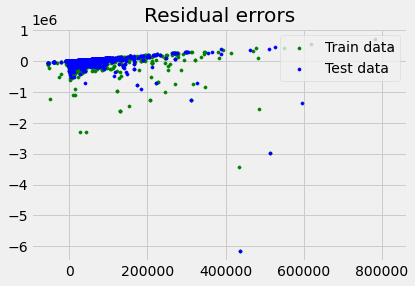

In [427]:
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 1)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [428]:
y_pred = reg.predict(X_test)

In [429]:
predicts  = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicts

,Actual,Predicted
318674,8896.0,10114.022705
371101,1224.0,535.471191
166426,10417.0,13001.207031
140841,0.0,765.582275
295373,2696.0,829.589111
...,...,...
177437,0.0,3211.607178
174244,11.0,180.989014
122844,2035.0,3730.412598
26293,0.0,700.105713


In [431]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3525.4210309556515


In [438]:
X_test['target'] = y_pred

<ipython-input-438-f7b2d97c5161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['target'] = y_pred


In [446]:
index_prediction = X_test.index
index_prediction

Int64Index([318674, 371101, 166426, 140841, 295373, 196205, 199195, 172994,
            236523, 364220,
            ...
            192785, 193172, 264561,   5727,  78033, 177437, 174244, 122844,
             26293, 117093],
           dtype='int64', length=111475)

In [451]:
df_result = df.iloc[index_prediction]
df_result['predicts_turn'] = y_pred 
df_result.head()

<ipython-input-451-206a13d4222b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['predicts_turn'] = y_pred


,client_id,gender,birth_date,create_date,nonresident_flag,businessman_flag,city,term,contract_sum,product_category_name,...,purchase_count,current_balance_avg_sum,current_balance_sum,current_debit_turn_sum,current_credit_turn_sum,card_type,age,target,group,predicts_turn
318674,5864fb412e720f6fab7bf5ab78b8b6b5,Ж,42,2015-07-15,R,0,Янаул,NaN,0.0,Договор на текущий счет для дебетовой карты,...,12,186900.0,212800.0,12600.0,87700.0,dc,1980,8896.0,Adult,10114.022705
371101,592b4c38cba740b98f781d172d54e2b8,Ж,67,2021-11-25,R,0,Краснодар,NaN,0.0,Договор на текущий счет для дебетовой карты,...,1,1000.0,100.0,12400.0,11000.0,dc,1955,1224.0,Retired,535.471191
166426,e736cf3bce71e3ead5195ffcc15f5f57,М,41,2015-02-11,R,0,Санкт-Петербург,NaN,0.0,Договор на текущий счет для дебетовой карты,...,3,0.0,0.0,94700.0,94700.0,cc,1981,10417.0,Adult,13001.207031
140841,8519e8fdef6bb9623450ec95e6bd37a7,М,21,2019-09-03,R,0,Нефтекамск,NaN,0.0,Договор на текущий счет для дебетовой карты,...,0,0.0,0.0,0.0,0.0,dc,2001,0.0,Young,765.582275
295373,4237929bbd55172e43573e884621bb03,М,70,2007-05-01,R,0,Месягутово,NaN,0.0,Договор на текущий счет для дебетовой карты,...,1,2300.0,1100.0,23600.0,24600.0,dc,1952,2696.0,Retired,829.589111


In [452]:
df_result.groupby(['group']).agg({'client_id':'count','predicts_turn':'mean'})

,client_id,predicts_turn
group,,
Adult,49610,4118.157414
Children,497,393.392741
Retired,25684,3558.231269
Young,31774,1994.775124


In [454]:
df.groupby(['group']).agg({'client_id':'count','target':'mean'})

,client_id,target
group,,
Adult,165090,4092.573681
Children,1640,390.009756
Retired,84988,3405.256095
Young,106575,1979.661741


# Save model 